【東吳推廣】**神經網路與深度學習**<br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位人才學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>
【參考書籍】[TensorFlow+Keras深度學習人工智慧實務應用](http://www.drmaster.com.tw/Bookinfo.asp?BookID=MP21710)<br>
【主要議題】MLP辨識手寫數字

In [2]:
import os, time, socket, datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# 新舊版本 keras

%autosave 120
   
pyVer = !python -V

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【工作目錄】{}".format(os.getcwd()))
print("【Python】{}".format(pyVer[0]))
print("【{}】{}".format(tf.__name__,tf.__version__))
print("【{}】{}".format(tf.keras.__name__,tf.keras.__version__))

SyntaxError: invalid syntax (<ipython-input-2-8604bd63d963>, line 5)

In [2]:
!conda env list

# conda environments:
#
base                     C:\Anaconda3
tf2-gpu               *  C:\Anaconda3\envs\tf2-gpu



In [3]:
help(tf.keras.datasets)

Help on package tensorflow_core.keras.datasets in tensorflow_core.keras:

NAME
    tensorflow_core.keras.datasets - Keras built-in datasets.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    //anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py




In [1]:
import tensorflow.keras.datasets as datasets

In [2]:
# x_train: image (ndarray)
(x_train, y_train), (x_test, y_test)=datasets.mnist.load_data() #手寫資料

In [3]:
print(type(x_train))
print(x_train.shape)
print(x_train.dtype) #uint8 u- un-signed unit int8 -- interger 8 (0-255)

print('----------------')
print(y_train.shape) # 一維 習慣用法 (3,), [3,]
print(y_train[0])
print(set(y_train)) # 集合

<class 'numpy.ndarray'>
(60000, 28, 28)
uint8
----------------
(60000,)
5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
print(type(y_train))

<class 'numpy.ndarray'>


In [15]:
print(x_test.shape)

(10000, 28, 28)


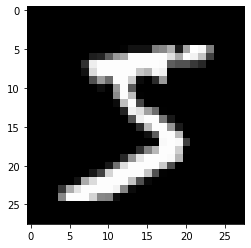

In [8]:
plt.figure(figsize=(4,4))
#plt.imread()
plt.imshow(x_train[0,:,:],cmap='gray') # color-map
plt.show()

In [9]:
# 每個圖像轉成一列
x_train_images=x_train.reshape(60000,28*28).astype('float32') #資料型態 float32
x_test_images=x_test.reshape(10000,28*28).astype('float32')

In [26]:
print(min(x_train_images[0,:]))
print(max(x_train_images[0,:]))
print(x_train_images.shape)

0.0
255.0
(60000, 784)


In [10]:
# 標準化
x_train_normalize=x_train_images/255
x_test_normalize=x_test_images/255

In [23]:
print(min(x_train_normalize[0,:]))
print(max(x_train_normalize[0,:]))

0.0
1.0


In [24]:
print(np.min(x_train_normalize))
print(np.max(x_train_normalize))

0.0
1.0


將 label 轉成 one-hot encode
        --原來 label 分數值，必需重 0 開始

In [11]:
y_train_OneHot=keras.utils.to_categorical(y_train)
y_test_OneHot=keras.utils.to_categorical(y_test)

In [12]:
print(y_train_OneHot.shape)
print(y_train[0])
print(y_train_OneHot[0])

(60000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


MLP 建模

In [26]:
model = keras.Sequential(name='MLP')

layers.Dense(
    units, # 設定神經元的個數
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs, # input_dim= 28*28 ＃每一個影像的大小
)

In [27]:
model.add(layers.Dense(units=256, 
                        input_dim=28*28, 
                        kernel_initializer='normal', # 參數隨機產生
                       activation='relu',
                       name='input_layer1'
))

In [28]:
model.add(layers.Dense(units=256, 
                        kernel_initializer='normal', # 參數隨機產生
                       activation='relu',
                       name='input_layer2'
))

In [29]:
model.add(layers.Dense(units=10, # 與 label 大小ㄧ 樣
                        kernel_initializer='normal', # 參數隨機產生
                       activation='softmax',
                       name='hidden_layer'
))

In [30]:
print(model.summary()) # Input Parameters = (28*28+1)*256
                                # Layer 2: 257*256
                                  # Hidden_layer: (256+1)*10

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer1 (Dense)         (None, 256)               200960    
_________________________________________________________________
input_layer2 (Dense)         (None, 256)               65792     
_________________________________________________________________
hidden_layer (Dense)         (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,
    **kwargs,
)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

In [20]:
train_history=model.fit(x=x_train_normalize, 
                               y=y_train_OneHot,
                               validation_split=0.2,
                               epochs=30,
                               batch_size=300, # 每次執行的資料
                               verbose=2) #verbose 顯示程式跑的過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 1s - loss: 0.6826 - accuracy: 0.8382 - val_loss: 0.3074 - val_accuracy: 0.9162
Epoch 2/30
48000/48000 - 1s - loss: 0.2823 - accuracy: 0.9218 - val_loss: 0.2330 - val_accuracy: 0.9350
Epoch 3/30
48000/48000 - 1s - loss: 0.2204 - accuracy: 0.9381 - val_loss: 0.1957 - val_accuracy: 0.9463
Epoch 4/30
48000/48000 - 1s - loss: 0.1818 - accuracy: 0.9483 - val_loss: 0.1674 - val_accuracy: 0.9548
Epoch 5/30
48000/48000 - 1s - loss: 0.1540 - accuracy: 0.9569 - val_loss: 0.1494 - val_accuracy: 0.9580
Epoch 6/30
48000/48000 - 1s - loss: 0.1335 - accuracy: 0.9628 - val_loss: 0.1391 - val_accuracy: 0.9610
Epoch 7/30
48000/48000 - 1s - loss: 0.1174 - accuracy: 0.9677 - val_loss: 0.1256 - val_accuracy: 0.9643
Epoch 8/30
48000/48000 - 1s - loss: 0.1039 - accuracy: 0.9713 - val_loss: 0.1187 - val_accuracy: 0.9665
Epoch 9/30
48000/48000 - 1s - loss: 0.0930 - accuracy: 0.9749 - val_loss: 0.1152 - val_accuracy: 0.9673
Epoch 10/30
48

In [21]:
type(train_history)

tensorflow.python.keras.callbacks.History

In [23]:
type(train_history.history)

dict

In [24]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

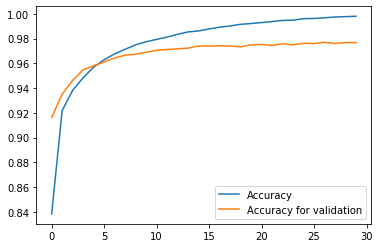

In [25]:
plt.figure(figsize=[6,4])
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.legend(['Accuracy','Accuracy for validation'])
plt.show()

CNN 建模

In [47]:
model = keras.Sequential(name='CNN')

In [48]:
#卷積層
model.add(layers.Conv2D(filters=16, # Conv2D 灰階; filters 過濾器個數
                        kernel_size=(5,5),
                       strides=(1,1),
                        padding='same',
                       input_shape=(28,28,1),
                       activation='relu',
                       name='conv_1')) #   灰階 (x,x,1);彩色 (x,x,3)

In [49]:
#池化層
model.add(layers.MaxPool2D(pool_size=(2,2),name='maxpool_1'))

In [50]:
#卷積層
model.add(layers.Conv2D(filters=36, # Conv2D 灰階; filters 過濾器個數
                        kernel_size=(5,5),
                       strides=(1,1),
                        padding='same',
                       activation='relu',
                       name='conv_2')) #   灰階 (x,x,1);彩色 (x,x,3)

In [51]:
#池化層
model.add(layers.MaxPool2D(pool_size=(2,2),name='maxpool_2'))

In [52]:
model.add(layers.Dropout(0.25))

In [53]:
#全連階層
model.add(layers.Flatten(name='flatten_layer'))

In [54]:
#MLP
model.add(layers.Dense(units=256,
                          activation='relu',
                          name='hidden_1'))

In [55]:
model.add(layers.Dropout(0.5))

In [56]:
#MLP
model.add(layers.Dense(units=10,
                          activation='softmax',
                          name='hidden_2'))

In [57]:
model.summary()
# (5*5+1)*16=416
# (5*5*16+1)*36=14436

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 36)        14436     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 1764)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 256)               451840  

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

In [62]:
print(x_train.shape)

(60000, 28, 28)


In [71]:
x_train_images=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/256

In [72]:
train_history=model.fit(x=x_train_images, 
                               y=y_train_OneHot,
                               validation_split=0.2,
                               epochs=30,
                               batch_size=300, # 每次執行的資料
                               verbose=2) #verbose 顯示程式跑的過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 32s - loss: 0.5697 - accuracy: 0.8262 - val_loss: 0.1264 - val_accuracy: 0.9634
Epoch 2/30
48000/48000 - 34s - loss: 0.1524 - accuracy: 0.9531 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 3/30
48000/48000 - 34s - loss: 0.1050 - accuracy: 0.9682 - val_loss: 0.0653 - val_accuracy: 0.9812
Epoch 4/30
48000/48000 - 35s - loss: 0.0873 - accuracy: 0.9738 - val_loss: 0.0534 - val_accuracy: 0.9843
Epoch 5/30
48000/48000 - 38s - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0495 - val_accuracy: 0.9860
Epoch 6/30
48000/48000 - 36s - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0481 - val_accuracy: 0.9864
Epoch 7/30
48000/48000 - 36s - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0410 - val_accuracy: 0.9883
Epoch 8/30
48000/48000 - 37s - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0395 - val_accuracy: 0.9890
Epoch 9/30
48000/48000 - 37s - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0380 - val_accuracy: 0.9898
Epoch